# Анализ оттока клиентов банка

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [42]:
# Загрузка датасета и удаление колонки RowNumber
churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop(columns='RowNumber')
churn_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

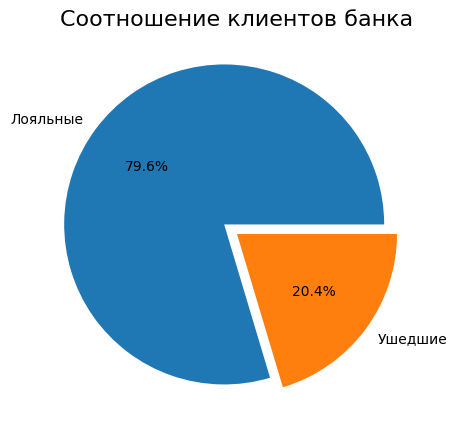

In [43]:
fig = plt.figure(figsize=(4, 4))
axes = fig.add_axes([0, 0, 1, 1])
exited = churn_data['Exited'].value_counts()
axes.pie(
    exited,
    labels=['Лояльные','Ушедшие'],
    autopct='%.1f%%',
    explode = [0.1, 0]
)
title = axes.set_title('Соотношение клиентов банка', fontsize=16);

Как видно из диаграммы процент ушедших клиентов составляет 20.4%, это говорит о том, что каждый пятый клиент решает уйти.

### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

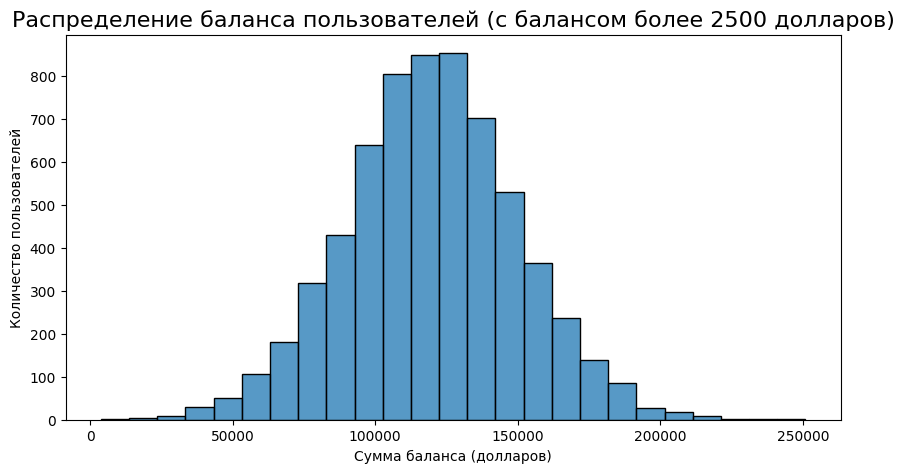

In [44]:
fig = plt.figure(figsize=(10, 5))
Balance = churn_data[churn_data['Balance']>2500].value_counts()
histplot = sns.histplot(
    data=Balance, 
    x='Balance', 
    bins=25,
)
histplot.set_title('Распределение баланса пользователей (с балансом более 2500 долларов)', fontsize=16)
histplot.set_xlabel('Сумма баланса (долларов)')
histplot.set_ylabel('Количество пользователей');

Из выборки исключены пользователи с нулевым балансом, которые составляют 36% клиентов банка.
Основная масса клиентов имеет баланс от 80 тыс. до 150 тыс. долларов. 
Гистограмма практически полностью соответствует нормальному распрелению

### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [45]:
fig_data=churn_data[churn_data['Balance']>2500]

fig = px.histogram(
    data_frame=fig_data,
    x='Balance',
    title='Распределение баланса клиентов',
    marginal='box', # Построим рядом коробчатую диаграмму
    labels={'Balance': 'Баланс', 'color':'Лояльность', 'count':'Количество'},
    width=1000,
    color=fig_data['Exited'].map({0:'лояльный', 1:'ушедший'})
)
fig.update_layout(xaxis_title="Баланс",
                  yaxis_title="Количество клиентов",
                  )
fig.show()

Распределение ушедших клиентов на шкале баланса примерно повторяет распределение лояльных клиентов.
Явных анамалий тут не наблюдается и в обоих случая это выглядит как нормальное распределение данных.
Число потенциальных выбросов у ушедших клиентов заметно больше, чем у лояльных

### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [46]:
fig = px.box(
    data_frame=churn_data,
    x='Age',
    y=churn_data['Exited'].map({0:'лояльный', 1:'ушедший'}),
    title='Распределение возраста в разрезе признака оттока',
    color=churn_data['Exited'].map({0:'лояльный', 1:'ушедший'}),
    labels={'Age': 'Возраст','color': 'Лояльность'},
)
fig.update_layout(xaxis_title="Возраст",
                  yaxis_title="Лояльность клиентов",
                  )
fig.show()

In [47]:
age_df = churn_data.groupby(['Exited','Age'], as_index=False)['Age'].value_counts()
age_df['Exited'] = age_df['Exited'].astype(bool)

fig = px.bar(
    data_frame=age_df,
    x='Age',
    y='count',
    barmode="group",
    color='Exited'
)
fig.update_layout(
    title='Распределение возраста клиентов в разрезе признака оттока',
    xaxis_title="Возраст",
    yaxis_title="Количество клиентов",
    height=800, #высота
    legend_title='Признак оттока',
    legend_orientation='v'
)
fig.show()

Возраст лояльных клиентов ниже возраста ушедших клиентов (медианное значение).
Клиенты после 70 становятся более консервативны не покидают банк, но их доля невелика.
Банку стоит обратить внимание на клиентов в возрасте от 38 до 51 года (25 и 75 квантилити).

### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [48]:
CreditScore_df = churn_data.copy()
CreditScore_df['Exited'] = CreditScore_df['Exited'].astype(bool)

fig = px.scatter(CreditScore_df, y="EstimatedSalary", x="CreditScore", color="Exited")

fig.update_layout(
    title='Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты.',
    xaxis_title="Кредитный рейтинг",
    yaxis_title="Предполагаемая запрплата",
    height=600, #высота
    width=1200, #ширина
    legend_title='Признак оттока',
    legend_orientation='v'
)

fig.show()

Взаимоствязь между предполагаемой зарплатой и кредитным рейтингом трудно проследить.

### 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

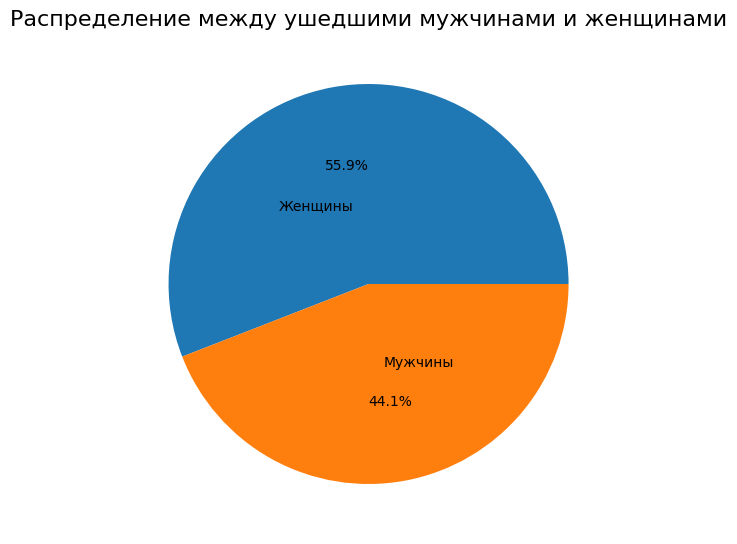

In [49]:
mask1 = churn_data['Exited'] == True
exited_count = churn_data[mask1].value_counts().sum()

Gender = churn_data[churn_data['Exited']==True]['Gender'].value_counts()
fig = plt.figure(figsize=(5, 5),facecolor = 'white')
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    Gender,
    labels=['Женщины', 'Мужчины'],
    labeldistance = 0.4,
    autopct='%.1f%%',
    explode = [0, 0]
)
title = axes.set_title('Распределение между ушедшими мужчинами и женщинами', fontsize=16);

Среди клиентов покинувших банк, женщин на 11.8 % больше, чем мужчин.

### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [50]:
bar_churn_df = churn_data.groupby(['NumOfProducts', 'Exited'], as_index=False).count()
bar_churn_df['Exited'] = bar_churn_df['Exited'].astype(bool)

fig = px.bar(
    bar_churn_df,
    x='NumOfProducts',
    y='CustomerId',
    color='Exited',
    barmode='group',
    text = 'CustomerId',
    title='Зависимость оттока клиентов от числа приобретенных у банка услуг'
)

fig.update_layout(
    xaxis_title='Количество приобретённых услуг',
    yaxis_title='Количество клиентов',
    legend_title='Признак оттока',
    legend_orientation='h',
    legend=dict(x=.5, y=1.11, xanchor="center")
)

fig.show()

Из графика видно, что большинство лояльных клиентов пользуются 1-2 услугами. Клиенты с двумя услугами реже уходят.
Так же интересно соотношение клиентов приобретших 3 и 4 услуги банка, видно что число лояльных клиентов в этих случаях значительно меньше.

### 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [53]:
act_df = churn_data.groupby(by='IsActiveMember', as_index=False)['Exited'].value_counts()
act_df['Exited'] = act_df['Exited'].astype(bool)

fig = px.bar(
    data_frame=act_df,
    x='IsActiveMember',
    y='count',
    text = 'count',
    barmode="group",
    color='Exited',
    orientation='v',
    height=800, #высота
    width=1200, #ширина
    title='Влияние статуса активного клиента на отток клиентов',
)

fig.update_layout(
    xaxis_title='Статус активности клиентов',
    yaxis_title='Количество клиентов',
    legend_title='Признак оттока',
    legend_orientation='h',
    legend=dict(x=.5, y=1.05, xanchor="center")
)   

fig.show()

Клинеты с присвоенным статусом активного клиента более лояльны к банку.

### 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [61]:
fig_data=churn_data.groupby(['Geography'], as_index=False).mean()
fig_data['percent']=fig_data['Exited']*100

fig = px.choropleth(
    data_frame=fig_data,
    locations='Geography',
    locationmode = "country names",
    color='percent',
    title='Распределение ушедших клиентов на карте',
    labels={'percent': 'Доля ушедших клиентов'},
    scope='europe',
    width=1000,
    height=500,
    color_continuous_scale='Reds'
)

fig.show()

C:\Users\velho\AppData\Local\Temp\ipykernel_13168\1904104068.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Доля ушедших клиентов больше в Германии.
Возможно это связано с большей конкурентностью в сфере банковских услуг в Германии и/или с недостаточной представленностью банка в стране.

### 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

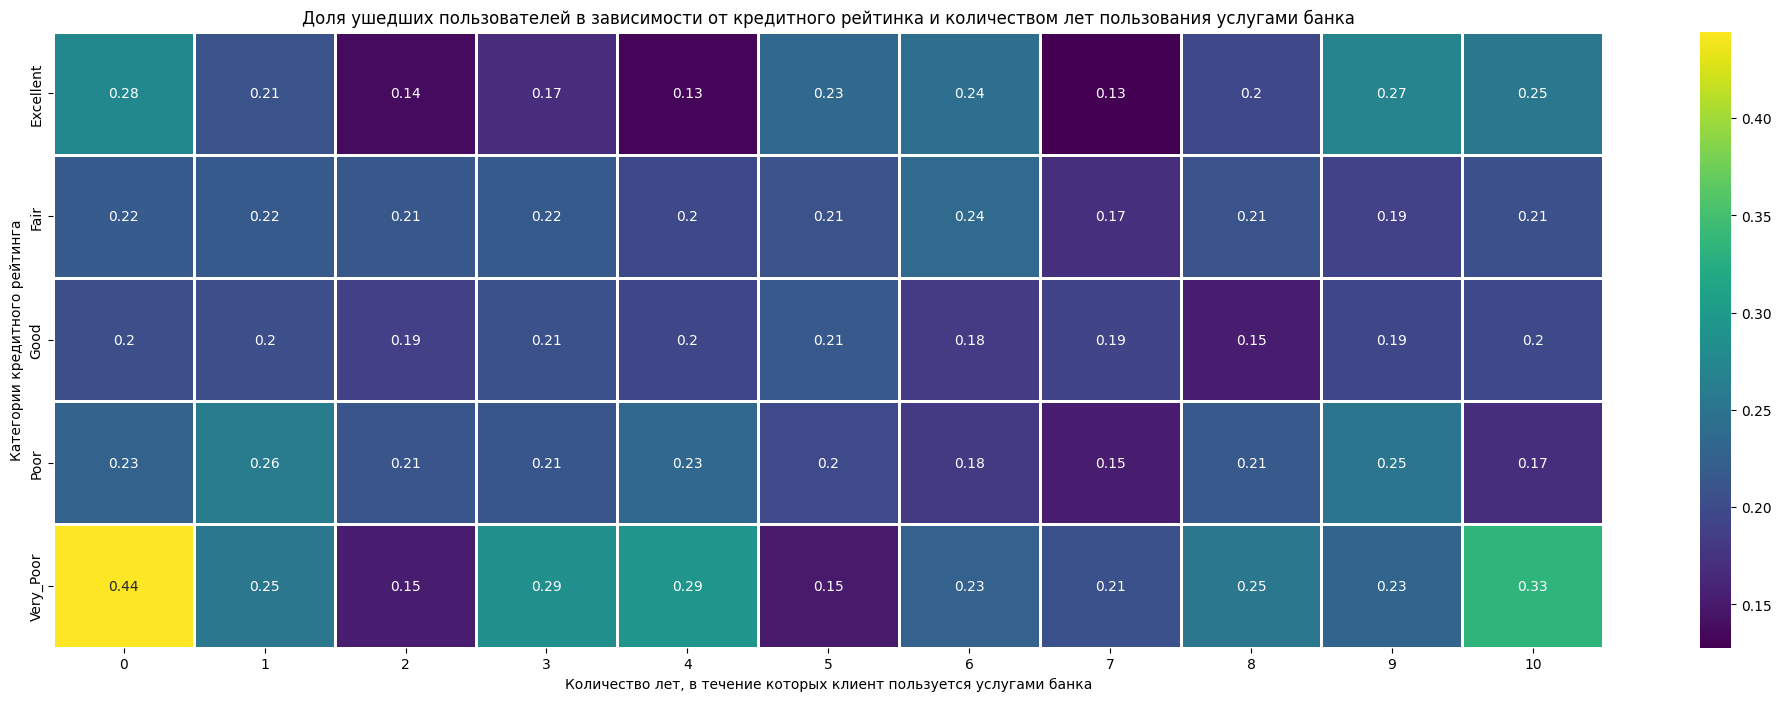

In [63]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

# добавляем новый признак 'CreditScoreCat'
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
table_df = churn_data.pivot_table(
            values='Exited',
            index='CreditScoreCat',
            columns='Tenure',
            fill_value=0
            )

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25, 8))
heatmap = sns.heatmap(
    table_df,
    linewidth=1,
    linecolor='w',
    cmap='viridis', # tab10/mako
    annot=True
)
heatmap.set_title('Доля ушедших пользователей в зависимости от кредитного рейтинка и количеством лет пользования услугами банка')
heatmap.set_xlabel('Количество лет, в течение которых клиент пользуется услугами банка')
heatmap.set_ylabel('Категории кредитного рейтинга');

По тепловой карте видно, что максимальное количество клиентов покидающих банк имеют низший кредитный рейтинг - "Very_Poor" и уходят они чаще всего в первый год сотрудничества с банком. Так же это чаще случается в 3, 4 и 10 годы работы с банком.